# Classification with Naive Bayes

In [2]:
import random

import pandas as pd

## The watermelon dataset

In the following we use the Watermelon dataset from Zhou's textbook, where each record represents a watermelon with its features (color, sound, texture, etc) and with a boolean value indicating if the watermelon is ripe or not.
Notice:
Input features have different types: *color, root, sound, texture, umbilicus, surface* are categorical (have a finite number of nominal values that can only enumerated and compared by equality operators), while *density, sugar* are numerical (continuous) and mathematical operators can be used to transform their values.

We can easily read this CSV dataset using pandas.

In [3]:
dataset = pd.read_csv('../datasets/watermelon-dataset.csv')
dataset

,ID,color,root,sound,texture,umbilicus,surface,density,sugar,ripe
0,1,green,curly,muffled,clear,hollow,hard,0.697,0.460,True
1,2,dark,curly,dull,clear,hollow,hard,0.774,0.376,True
2,3,dark,curly,muffled,clear,hollow,hard,0.634,0.264,True
3,4,green,curly,dull,clear,hollow,hard,0.608,0.318,True
4,5,light,curly,muffled,clear,hollow,hard,0.556,0.215,True
5,6,green,slightly curly,muffled,clear,slightly hollow,soft,0.403,0.237,True
6,7,dark,slightly curly,muffled,slightly blurry,slightly hollow,soft,0.481,0.149,True
7,8,dark,slightly curly,muffled,clear,slightly hollow,hard,0.437,0.211,True
8,9,dark,slightly curly,dull,slightly blurry,slightly hollow,hard,0.666,0.091,False
9,10,green,straight,crisp,clear,flat,soft,0.243,0.267,False


# Your work: what you have to do

- 1. Use `CategoricalNB` and `GaussianNB` from `scikit-learn` to build a Naive Bayes classifier on the watermelon dataset. For the estimated probabilities, consider the Laplace correction techniques.

- 2. Using the previously trained model, predict the ripe/unripe class of the test example proposed by the book:
*ID=T1, color=green, root=curly, sound=muffled, texture=clear, umbilicous=hollow, surface=hard, density=0.697, sugar=0.460. *

- 3. Giving the dataset size, consider now an hold-out technique in which you draw randomly a single test example and you train the model on the remaining examples.

- 4. Build the confusion matrix and the ROC curves for naive Bayes and decision Trees

- 5. Implement statistical tests (e.g. `ttest_rel` in [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)) to compare model trained at 3. to a Decision Tree on the same dataset with an hold-out method. Have the observed differences in predictive performance statistical  significance?

# **Svolgimento degli esercizi**

- 1. Use `CategoricalNB` and `GaussianNB` from `scikit-learn` to build a Naive Bayes classifier on the watermelon dataset. For the estimated probabilities, consider the Laplace correction techniques.
- 2. Using the previously trained model, predict the ripe/unripe class of the test example proposed by the book: *ID=T1, color=green, root=curly, sound=muffled, texture=clear, umbilicous=hollow, surface=hard, density=0.697, sugar=0.460. *

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ===============================
# 1. Preprocessing separo feature e target
# ===============================
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X.drop(columns=['ID'], inplace=True)

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Codifica delle categoriche
encoder = OrdinalEncoder()
X_cat = encoder.fit_transform(X[categorical_cols])

# Estraggo anche le numeriche
X_num = X[numeric_cols].to_numpy()

# Codifico il target
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# ===============================
# 2. Training separato
# ===============================
#O setto priori a false e trovo un modo per calcolare i priors sulle classi (calcolo normalizzato)
#True invece lo fa di default
cat_nb = CategoricalNB(alpha=1, fit_prior=True)
cat_nb.fit(X_cat, y_encoded)

gauss_nb = GaussianNB(var_smoothing=1e-9)
gauss_nb.fit(X_num, y_encoded)

test_example = pd.DataFrame({
    'color': ['green'],
    'root': ['curly'],
    'sound': ['muffled'],
    'texture': ['clear'],
    'umbilicus': ['hollow'],
    'surface': ['hard'],
    'density': [0.697],
    'sugar': [0.460]
})

test_cat = encoder.transform(test_example[categorical_cols])

print(test_cat)
cat_probs = cat_nb.predict_proba(test_cat)
num_probs = gauss_nb.predict_proba(test_example[numeric_cols].to_numpy())

print(cat_probs)
print(num_probs)

#Devo integrare la prob a priori, integrandolo in uno dei due classificatori, già fatto con fit_prior = True
# Combinazione
combined_probs = cat_probs * num_probs #(assumo indipendeza)

# Classe finale predetta
y_pred_combined = np.argmax(combined_probs, axis=1)

predicted_class = label_enc.inverse_transform(y_pred_combined)

print("Probabilità combinate:", combined_probs)
print("Classe predetta:", predicted_class[0])


[[1. 0. 2. 1. 1. 0.]]
[[0.05580349 0.94419651]]
[[0.04164757 0.95835243]]
Probabilità combinate: [[0.00232408 0.90487301]]
Classe predetta: True


- 3. Giving the dataset size, consider now an hold-out technique in which you draw randomly a single test example and you train the model on the remaining examples.

In [7]:
import numpy as np
import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt


# ===============================
# STEP 3: Hold-out 1-sample (LOO style)
# ===============================

# 0) Shuffle per non dipendere dall'ordine del dataset
dataset_shuffled = shuffle(dataset, random_state=42).reset_index(drop=True)

# 1) Feature/target
X = dataset_shuffled.iloc[:, :-1].copy()
y = dataset_shuffled.iloc[:, -1].copy()

# 2) Drop ID se esiste
if "ID" in X.columns:
    X.drop(columns=["ID"], inplace=True)

# 3) Colonne
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

# 4) Encoder/Label encoder
encoder = OrdinalEncoder()
X_cat_all = encoder.fit_transform(X[categorical_cols]) if categorical_cols else None

X_num_all = X[numeric_cols].to_numpy() if numeric_cols else None

label_enc = LabelEncoder()
y_all = label_enc.fit_transform(y)

# 5) Contenitori risultati (servono per confusion matrix e ROC)
y_true_all = []
y_pred_nb_all = []
y_score_nb_all = []   # prob classe positiva (colonna 1)
y_pred_dt_all = []
y_score_dt_all = []   # prob classe positiva (colonna 1)



# 6) Loop leave-one-out (17 volte: 1 test, 16 train)
n = len(dataset_shuffled)

for test_idx in range(n):
    train_idx = [i for i in range(n) if i != test_idx]

    # ----- split per NB -----
    y_train = y_all[train_idx]
    y_test = y_all[test_idx]

    # Categorical part
    if categorical_cols:
        X_train_cat = X_cat_all[train_idx]
        X_test_cat = X_cat_all[[test_idx]]

        # Laplace smoothing alpha=1, fit_prior True così usa le prior dal training
        cat_nb = CategoricalNB(alpha=1.0, fit_prior=True)
        cat_nb.fit(X_train_cat, y_train)

        cat_probs = cat_nb.predict_proba(X_test_cat)  # shape (1,2)
    else:
        # se non ci sono categoriche, neutro moltiplicativo
        cat_probs = np.ones((1, len(label_enc.classes_)))

    # Numeric part
    if numeric_cols:
        X_train_num = X_num_all[train_idx]
        X_test_num = X_num_all[[test_idx]]

        gauss_nb = GaussianNB(var_smoothing=1e-9)
        gauss_nb.fit(X_train_num, y_train)

        num_probs = gauss_nb.predict_proba(X_test_num)  # shape (1,2)
    else:
        num_probs = np.ones((1, len(label_enc.classes_)))

    # Combino assumendo indipendenza (cat * num)
    combined_probs = cat_probs * num_probs

    y_pred_nb = int(np.argmax(combined_probs, axis=1)[0])
    y_score_nb = float(combined_probs[0, 1])  # score classe positiva (label 1)

    # ----- split per Decision Tree -----
    # DecisionTree vuole tutte le feature numeriche → uso categoriche già encodate + numeriche grezze
    # Costruisco X_all_dt una volta e poi indicizzo
    if test_idx == 0:
        # creo solo una volta fuori dal loop
        if categorical_cols:
            X_dt_all = X.copy()
            X_dt_all[categorical_cols] = encoder.transform(X[categorical_cols])
        else:
            X_dt_all = X.copy()
        X_dt_all = X_dt_all.to_numpy()

    X_train_dt = X_dt_all[train_idx]
    X_test_dt = X_dt_all[[test_idx]]

    dt = DecisionTreeClassifier(
        criterion="entropy",
        random_state=42
    )
    dt.fit(X_train_dt, y_train)

    y_pred_dt = int(dt.predict(X_test_dt)[0])
    y_score_dt = float(dt.predict_proba(X_test_dt)[0, 1])

    # ----- salva risultati -----
    y_true_all.append(y_test)

    y_pred_nb_all.append(y_pred_nb)
    y_score_nb_all.append(y_score_nb)

    y_pred_dt_all.append(y_pred_dt)
    y_score_dt_all.append(y_score_dt)


# Trasforma in array
y_true_all = np.array(y_true_all)
y_pred_nb_all = np.array(y_pred_nb_all)
y_score_nb_all = np.array(y_score_nb_all)
y_pred_dt_all = np.array(y_pred_dt_all)
y_score_dt_all = np.array(y_score_dt_all)

print("Done. Predizioni raccolte su", n, "hold-out singoli.")
print("NB accuracy:", (y_pred_nb_all == y_true_all).mean())
print("DT accuracy:", (y_pred_dt_all == y_true_all).mean())


Done. Predizioni raccolte su 17 hold-out singoli.
NB accuracy: 0.7058823529411765
DT accuracy: 0.7058823529411765


- 4. Build the confusion matrix and the ROC curves for naive Bayes and decision Trees

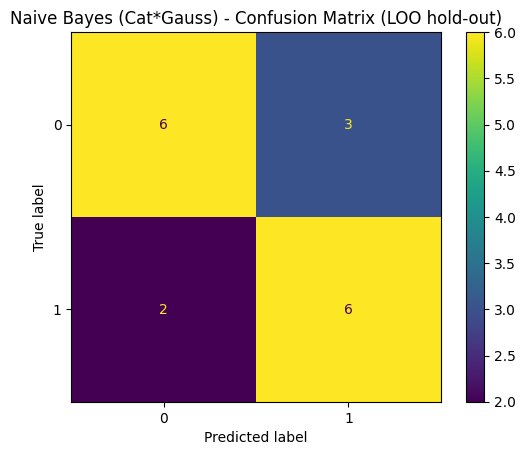

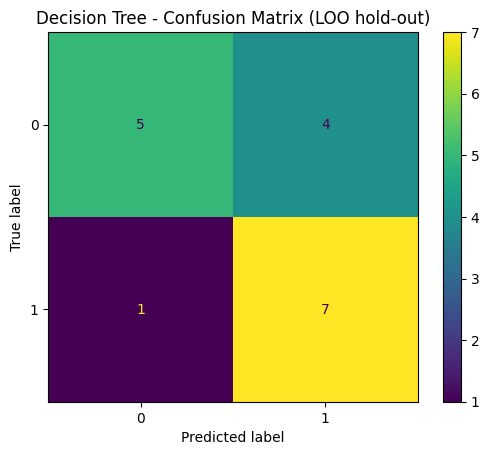

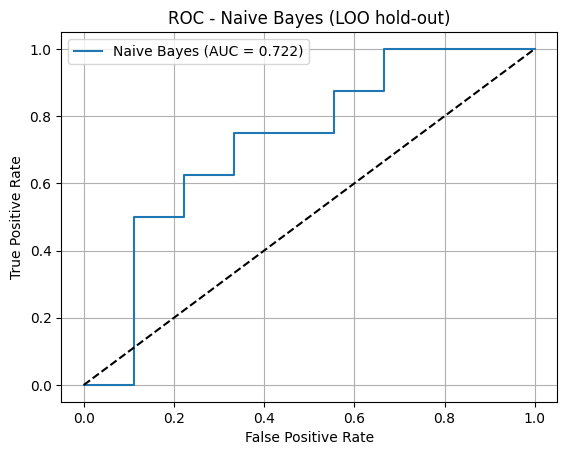

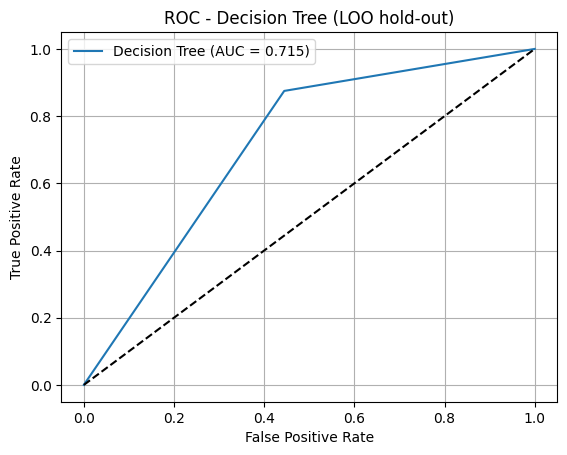

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# ===============================
# STEP 4: Confusion Matrix + ROC (NB vs DT)
# ===============================

# ---- Confusion Matrix: Naive Bayes ----
disp_nb = ConfusionMatrixDisplay.from_predictions(
    y_true_all, y_pred_nb_all
)
plt.title("Naive Bayes (Cat*Gauss) - Confusion Matrix (LOO hold-out)")
plt.show()

# ---- Confusion Matrix: Decision Tree ----
disp_dt = ConfusionMatrixDisplay.from_predictions(
    y_true_all, y_pred_dt_all
)
plt.title("Decision Tree - Confusion Matrix (LOO hold-out)")
plt.show()

# ---- ROC Curve: Naive Bayes ----
fpr_nb, tpr_nb, _ = roc_curve(y_true_all, y_score_nb_all)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Naive Bayes (LOO hold-out)")
plt.legend()
plt.grid(True)
plt.show()

# ---- ROC Curve: Decision Tree ----
fpr_dt, tpr_dt, _ = roc_curve(y_true_all, y_score_dt_all)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Decision Tree (LOO hold-out)")
plt.legend()
plt.grid(True)
plt.show()
